In [ ]:
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {
    'transition': 'slide',
              'width': 1000,
              'height': 600,
              'scroll': True,
    'theme':'black'
})

<link rel="stylesheet" href="node_modules/@fortawesome/fontawesome-free/css/all.min.css" />
<h1>
						Conso : Exploitons nos tickets de caisse dématérialisés !
					</h1>
					<div>
						<div class="headers">
							<div class="small">
								<p>TechnoZaure<br />Nantes 2023 #1<br />Track Tech</p>
							</div>
							<div>
								<img src="znk3.png" class="w-32 h-32" />
							</div>
							<div>
								🐘
							</div>
							<div class="social">
								<img src="./philippe.jpg" />
								<div>
									<i class="fa-brands fa-twitter"></i> PhilTheTea <br />
									<i class="fa-brands fa-github"></i> philippetony
								</div>
							</div>
						</div>
					</div>

<center><img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExNDEzN2UyYTc0NWY2YjIzNjgwY2YyMTdiNDhlOTIyYzcyZjcyNGYxNyZlcD12MV9pbnRlcm5hbF9naWZzX2dpZklkJmN0PWc/xc3OTAUFkT0TT5DtSv/giphy.gif"/></center>

# Tickets dématérialisés

* Pour tous les porteurs de carte de fidélité

* (à partir du 1er août 2023) Impression des tickets systématique interdite (mais disponible à la demande)

* possibilité pour les consommateurs d'avoir un accès à leur ticket sans forcément de carte fidélité (en théorie)

# Tickets envoyés par Système&nbsp;U

- Pdf directement envoyé par e-mail 👍

- Pdf en mode Texte 😃👍

- Mis en place dès 2021

# Tickets envoyés par Lidl

- Image (png/jpg)

- Via l'application (téléchargement manuel)

# Autres enseignes
| Enseigne | Type Pdf | Mode récupération |
|----------|----------|-------------------|
| Leclerc  | ?        | Application       |
| Intermarché | Texte | E-mail            |
| Auchan   | ?        | ?                 |
| Aldi     | ?        | ?                 |
| Casino   | ?        | ?                 |
| Carrefour| ?        | ?                 |
| ... |||
| Decathlon | Texte   | E-mail            |
| Intersport| Texte   | E-mail            |

# Extraction de boîte mail
* L'idéal avec une adresse source
* Ou un libellé (via des règles)
* Accès IMAP (GMail)


# Extraction de bote mail

In [1]:
import imaplib
import json

In [2]:
with open(".credentials.json","r") as f:
        login, password = json.load(f)

In [3]:
mail = imaplib.IMAP4_SSL('imap.gmail.com')
mail.login(login, password)
mail.select()  # connect to inbox.

('OK', [b'4705'])

In [4]:
result, data = mail.search(None, '(FROM ticket-caisse@systeme-u.fr)')
ids = data[0]
id_list = ids.split()
print(id_list)

[b'657', b'721', b'790', b'888', b'889', b'917', b'954', b'994', b'1084', b'1105', b'1181', b'1257', b'1319', b'1400', b'1468', b'1621', b'1762', b'1763', b'1767', b'1890', b'1915']


# Extraction de boîte mail

In [5]:
import re
from email.parser import BytesParser
from email.policy import default

In [6]:
for id in id_list:
        res, dat = mail.fetch(id, "(RFC822)")
        raw = dat[0][1]
        new_msg = BytesParser(policy=default).parsebytes(raw)
        for attachment in new_msg.iter_parts():
            if 'Content-Disposition' not in attachment.keys():
                continue
            if match := re.search("Ticket de caisse_[_0-9-]+.pdf", 
                                  attachment.get_filename()):
                with open(f"input/u/{match.group()}", "wb") as f:
                    f.write(attachment.get_content())
                    print(attachment.get_filename())

Ticket de caisse_03102022-192213.pdf
Ticket de caisse_09102022-114817.pdf
Ticket de caisse_15102022-171738.pdf
Ticket de caisse_26102022-184735.pdf
Ticket de caisse_26102022-185722.pdf
Ticket de caisse_29102022-130242.pdf
Ticket de caisse_02112022-133110.pdf
Ticket de caisse_05112022-185748.pdf
Ticket de caisse_16112022-122335.pdf
Ticket de caisse_19112022-190656.pdf
Ticket de caisse_26112022-142058.pdf
Ticket de caisse_03122022-180544.pdf
Ticket de caisse_09122022-130012.pdf
Ticket de caisse_27122022-190526.pdf
Ticket de caisse_31122022-135426.pdf
Ticket de caisse_07012023-141703.pdf
Ticket de caisse_14012023-111323.pdf
Ticket de caisse_14012023-111403.pdf
Ticket de caisse_14012023-171904.pdf
Ticket de caisse_20012023-134726.pdf
Ticket de caisse_21012023-143722.pdf


# Extraction de boîte mail
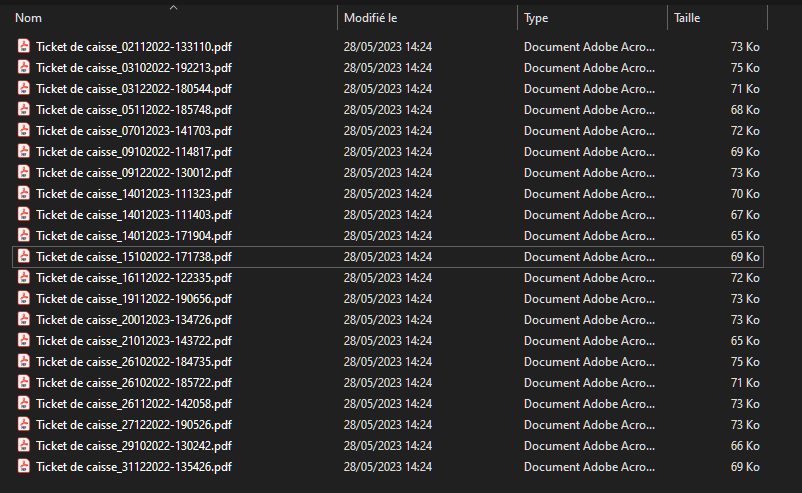

# Lecture d'un PDF texte


In [7]:
import pdftotext

with open('input/u/Ticket de caisse_20012023-134726.pdf', 'rb') as f:
    pdf = pdftotext.PDF(f)
    if (len(pdf) == 1):
        ticket_content = pdf[0]
        print(ticket_content)

                          SAS GALEDIS
                   22 RUE DE LA GALARNIERE
                               REZE
                           44400     FR
                   Telephone : 0240131819
              SIRET 44496339100016 - NAF 4711D
                      TVA FR47444963391
  Opérateur           Date         Heure          TPV      Ticket
 111     CC        20/01/23        13:09            3       190998
 >>>> ULTRA FRAIS
 P.YOPLAIT DOUBLE 0% FRTS JN X8                        2,64 €   11
 FF.NATURE 0%MG U 8X100G                               1,71 €   11
 YRT BRAS.0% CERISE L&F 4X125G                         1,61 €   11
 >>>> LAITS ET DERIVES
 LAIT UHT 1/2EC.U BK SLIM 6X1L                         5,70 €   11
 >>>> BOISSONS SANS ALCOOL
 COCA COLA Z.PET 4X1,75L 10%OFF                        6,01 €   11
 >>>> SIROPS
 BOIS.CON.GRENADI.0%SUCRE U75CL
      2 x      2,16 €                                  4,32 €   11
 >>>> PATIS.INDUSTRIELLE
 MADEL.NOIS.CHOCO LT COQUE 240G          


# Lecture Ticket texte (U)

In [8]:
single_line_u_pattern = ' *([A-Z0-9 .,/()&%-]+) +([0-9,]+) € +[0-9]+ *$'

for line in ticket_content.split('\n'):
    if match := re.match(single_line_u_pattern, line):
        print(match.groups())

('P.YOPLAIT DOUBLE 0% FRTS JN X8                       ', '2,64')
('FF.NATURE 0%MG U 8X100G                              ', '1,71')
('YRT BRAS.0% CERISE L&F 4X125G                        ', '1,61')
('LAIT UHT 1/2EC.U BK SLIM 6X1L                        ', '5,70')
('COCA COLA Z.PET 4X1,75L 10%OFF                       ', '6,01')
('MADEL.NOIS.CHOCO LT COQUE 240G                       ', '4,15')
('PANES CABILLAUD FINDUSX10 510G                       ', '6,56')
('PAP.TOIL.MOELL.ROSE 3 PL.U X12                       ', '5,18')
('ECHINE DE PORC AVEC OS A ROTIR                       ', '4,50')
('STICK LEVRES ORIGINAL LABELLO                        ', '1,61')
('GLACAGE CACAO VAHINE ST 120G                         ', '2,01')
('AMANDES EN POUDRE U 125G                             ', '1,73')
('SUCRE POUDRE DADDY D.KRAF.750G                       ', '1,31')
('TOMATE RONDE CHARNUES A FARCIR                       ', '2,62')
('TORTILLAS SOUPLES U X8 320G                          ', '1,99')
('POIRE CO


# Lecture Ticket texte (U)

In [9]:
single_line_u_pattern = ' *([A-Z0-9 .,/()&%-]+) +([0-9,]+) € +[0-9]+ *$'
multi_line_u_pattern = ' *(\d+) +x +([0-9,]+) € +([0-9,]+) € +[0-9]+ *$'

for line in ticket_content.split('\n'):
    if match := re.match(single_line_u_pattern, line):
        print(match.groups())
    elif match := re.match(multi_line_u_pattern, line):
        print(match.groups())

('P.YOPLAIT DOUBLE 0% FRTS JN X8                       ', '2,64')
('FF.NATURE 0%MG U 8X100G                              ', '1,71')
('YRT BRAS.0% CERISE L&F 4X125G                        ', '1,61')
('LAIT UHT 1/2EC.U BK SLIM 6X1L                        ', '5,70')
('COCA COLA Z.PET 4X1,75L 10%OFF                       ', '6,01')
('2', '2,16', '4,32')
('MADEL.NOIS.CHOCO LT COQUE 240G                       ', '4,15')
('PANES CABILLAUD FINDUSX10 510G                       ', '6,56')
('PAP.TOIL.MOELL.ROSE 3 PL.U X12                       ', '5,18')
('ECHINE DE PORC AVEC OS A ROTIR                       ', '4,50')
('STICK LEVRES ORIGINAL LABELLO                        ', '1,61')
('GLACAGE CACAO VAHINE ST 120G                         ', '2,01')
('AMANDES EN POUDRE U 125G                             ', '1,73')
('SUCRE POUDRE DADDY D.KRAF.750G                       ', '1,31')
('TOMATE RONDE CHARNUES A FARCIR                       ', '2,62')
('TORTILLAS SOUPLES U X8 320G                         


# Lecture Ticket texte (U)

In [10]:
single_line_u_pattern = ' *([A-Z0-9 .,/()&%-]+) +([0-9,]+) € +[0-9]+ *$'
multi_line_u_pattern = ' *(\d+) +x +([0-9,]+) € +([0-9,]+) € +[0-9]+ *$'

lines = ticket_content.split('\n')
for line_number, line in enumerate(lines):
    if match := re.match(single_line_u_pattern, line):
        print(match.groups())
    elif match := re.match(multi_line_u_pattern, line):
        print(lines[line_number-1], match.groups())

('P.YOPLAIT DOUBLE 0% FRTS JN X8                       ', '2,64')
('FF.NATURE 0%MG U 8X100G                              ', '1,71')
('YRT BRAS.0% CERISE L&F 4X125G                        ', '1,61')
('LAIT UHT 1/2EC.U BK SLIM 6X1L                        ', '5,70')
('COCA COLA Z.PET 4X1,75L 10%OFF                       ', '6,01')
 BOIS.CON.GRENADI.0%SUCRE U75CL ('2', '2,16', '4,32')
('MADEL.NOIS.CHOCO LT COQUE 240G                       ', '4,15')
('PANES CABILLAUD FINDUSX10 510G                       ', '6,56')
('PAP.TOIL.MOELL.ROSE 3 PL.U X12                       ', '5,18')
('ECHINE DE PORC AVEC OS A ROTIR                       ', '4,50')
('STICK LEVRES ORIGINAL LABELLO                        ', '1,61')
('GLACAGE CACAO VAHINE ST 120G                         ', '2,01')
('AMANDES EN POUDRE U 125G                             ', '1,73')
('SUCRE POUDRE DADDY D.KRAF.750G                       ', '1,31')
('TOMATE RONDE CHARNUES A FARCIR                       ', '2,62')
('TORTILLAS SOUPLES U 

# Lecture d'une Image

<center><img src="input/lidl/2023.04.21_12002851120230421148737.jpg" width="30%"/></center>

# Lecture d'une Image

* L'image est très propre (comparée à une photo ou un scan)

* Reconnaissance optique de caractères (OCR)

# Lecture d'une Image

In [11]:
from pytesseract import image_to_string
content = image_to_string(
    'input/lidl/2023.04.21_12002851120230421148737.jpg'
)
print(content)

LoDL

NANTES HUGO

44200NANTES
Ticket de vente

Article P.U.EUR Qté EUR

Heinz Ketchup top do 2,59 xX 1 2,59 A
Salade piémont jambo 2,21 x 1 2,21 A
Chips paysannes 1,45 x 1 1,45 A
Chipolatas supérieur 3,65 x 1 3,65 A
Merguez fortes 7,79 X 1 7,79 A
Lay's Chips BBQ 1,69 x 1 1,69 A
Baguette campagnarde 0,79 x 4 3,16 A
Taboulé oriental 1,39 x 1 1,39 A
Salade de carottes 0,99 x 1 0,99 A
Moutarde mi-forte 1,89 x 1 1,89 A

Nombre de lignes: 10

A payer 26,81
25,41 HT

Carte 26,81
TVA TauxX MONT.TTC MONT.TVA TOTAL HT
A 5,5% 26,81 1,40 25,41

code-barres .. 0888285114873701210423
2851  148737/01/21/01 21.04.23 12:01:11
Siret: 34326262204901 Code APE: 4711D
NI: FR 85 343 262 622 (NF525)
GKR12.08.09.58-SP01 BO223a6-z 068421
Garantie légale de conformité 2 ans
Factures et pieces détachées
Disponibles sur lidl.fr
CARTE BANCAIRE
SANS CONTACT

a0000000426010
CB
LE 21-04-23 A 12-01-56
LIDL
44200
NANTES
2473507
34326262204380
30002
KREKKEEREEEEOT 7G
544d652003272b2d
331 701 001234 000904
C
No AUTO: 255

# Quelques heures plus tard
<center><img src='https://media.giphy.com/media/scZPhLqaVOM1qG4lT9/giphy.gif'/></center>

# Quelques heures plus tard

<img src="recapitulatif1.excalidraw.png"/>

# Quelques heures plus tard

<img src="recapitulatif2.excalidraw.png"/>

# Mini base de données


In [14]:
import sqlite3
con = sqlite3.connect("tracktheprice.db")
con.execute("SELECT * FROM ticket").fetchone()

(1, '2022-03-30', 'U', 'SAS GALEDIS 22 RUE DE LA GALARNIERE REZE 44400     FR')

In [15]:
con.execute("SELECT * FROM article_price").fetchone()

(1, 'CHOCAPIC NESTLE PAQUET 750G', 3.5, 'CEREALES ET POUDRES CHO', 1)

# Quelques chiffres

In [16]:
print(f"{con.execute('SELECT count(*) from ticket').fetchone()[0]} tickets analysés")
print(f"{con.execute('SELECT count(*) from article_price').fetchone()[0]} prix relevés")
print(f"{con.execute('SELECT count(distinct article_name) from article_price').fetchone()[0]} articles differents")

112 tickets analysés
1729 prix relevés
651 articles differents


In [17]:
print("Article avec le plus de prix relevés : " + 
      str(con.execute('select count(*) over (partition by article_name)'
                      ' as c from article_price order by c desc')
          .fetchone()[0]))

Article avec le plus de prix relevés : 56


# Quelques chiffres

In [18]:
print("Nombre d'artibles avec au moins 2 prix relevés : " + 
     str(con.execute('with cnt as ('
            'select count(*) as c, article_name from article_price group by article_name'
         ') select count(*) from cnt where c > 1')
          .fetchone()[0]))

Nombre d'artibles avec au moins 2 prix relevés : 224


In [20]:
con.execute('with cnt as ('
            'select count(*) as c, article_name '
            'from article_price group by article_name'
         ') select * from cnt order by c desc limit 10 ')\
          .fetchall()

[(56, 'JAMBON SUP DD VPF U 2TR'),
 (38, 'P.YOPLAIT DOUBLE 0% FRTS JN X8'),
 (35, 'POIRE CONFERENCE'),
 (27, 'LAIT UHT 1/2EC.U BK SLIM 6X1L'),
 (26, 'BOIS.CON.GRENADI.0%SUCRE U75CL'),
 (26, 'MOUCH.BLANC 3 PLIS U BTE X110'),
 (23, 'SIR.ZERO TEISSEIRE CASSIS 60CL'),
 (21, 'CRANBERRIES SACHET 125G'),
 (21, 'MUESLI CROUSTIL.3 CHOCO.U 500G'),
 (19, 'EDAM PAST.TRANCH.U 24%MG 200G')]

# Et en graphes ça donne quoi&nbsp;?

![image](./nawak.png)

![image](./big_mess_u_all.png)

![image](./nice5_with_pears.png)

![image](./plot_LAITS_ET_DERIVES.png)

![image](./plot_PAIN_DE_MIE_LS_.png)

![image](./plot_PATES.png)

![image](./plot_ULTRA_FRAIS.png)

# Comment profiter de ces infos en faisant les courses&nbsp;?


In [ ]:
import csv
items = con.execute("SELECT article_name, price, category, date, store_name, store_city "
            "FROM article_price "
            "JOIN ticket ON ticket.id = article_price.ticket_id").fetchall()
with open("articles.csv", "w+") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(['article_name','price','category','date', 'store_name', 'store_city'])
    writer.writerows(items)

In [ ]:
with open("articles.csv","r") as f:
    content = f.read()
print(content)

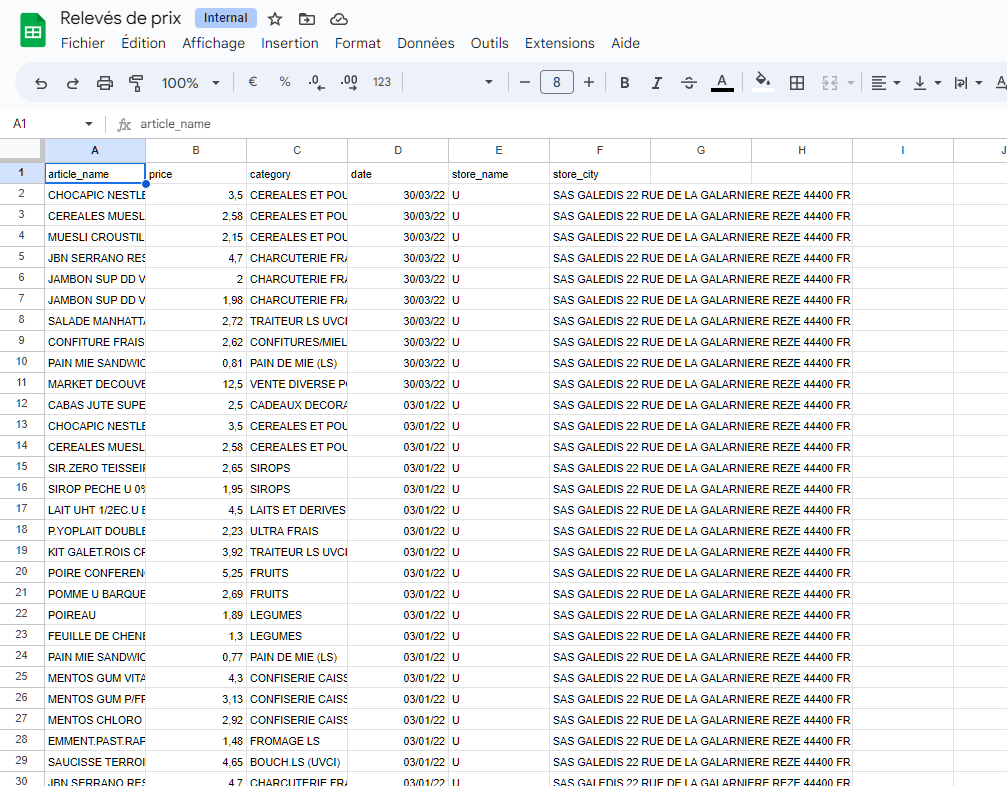

<center><img width="30%" src="Screenshot_2023-05-29-16-43-50-24_f90b96e7af3c5a594eb0c92de7fc5fe1.jpg"/></center>

<center><img width="30%" src="Screenshot_2023-05-29-16-42-38-89_f90b96e7af3c5a594eb0c92de7fc5fe1.jpg"/></center>

<center><img width="30%" src="Screenshot_2023-05-29-16-42-47-75_f90b96e7af3c5a594eb0c92de7fc5fe1.jpg"/></center>

<center>
    <img src="https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExOGM2M2I2OWI2MzRjNmExNjZlNjg3ZjkwY2IwYTlhNjYyZjVkNjdiMyZlcD12MV9pbnRlcm5hbF9naWZzX2dpZklkJmN0PWc/CIJsP7PsWvZM4/giphy.gif"/></center>

# La suite ?

* Arriver à regrouper les articles entre les enseignes (IA ?)

* Rendre la partie mobile plus sexy ? (Reconnaissance de texte ?)

* Plus de données.

<center><div class="waviy">
					<span>Q</span>
					<span style="--i:2">U</span>
					<span style="--i:3">E</span>
					<span style="--i:4">S</span>
					<span style="--i:5">T</span>
					<span style="--i:6">I</span>
					<span style="--i:7">O</span>
					<span style="--i:8">N</span>
					<span style="--i:9">S</span>
					<span style="--i:10">?</span>
				</div>
   </center>

<center><h2>Merci</h2></center>
				<div class="ending">
					<div
						style="">
						<img class="avatar"
							src="philippe.jpg" />
						<div class="text-xl">Philippe TONY</div>
						<div class="text-xl"><i class="fab fa-github"></i>philippetony<br /><i
								class="fa-brands fa-twitter"></i>PhilTheTea</div>
						<div class="text-xl">Développeur / Formateur <br />@ Zenika Nantes 🐘</div>
					</div>
					<div>						
						<p>
							Slides :
							<br />
							https://github.com/philippetony/how-can-seniority-help-in-writing-a-cash-register-software
						</p>
					</div>
				</div>